<a href="https://colab.research.google.com/github/karinasaidene/DS_bootcamp_homework/blob/main/DS_bootcamp_homework/Unit4/Exemple_network_suing_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf 
from PIL import Image
%matplotlib inline
from matplotlib.pyplot import imshow
from tensorflow.keras import layers, Input
from keras.models import Sequential , Model
from keras.layers import Flatten, Dense, Dropout
from keras import regularizers
from tensorflow import keras
import os
import pickle as pk
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import seaborn as sns
import io
import datetime



In [7]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


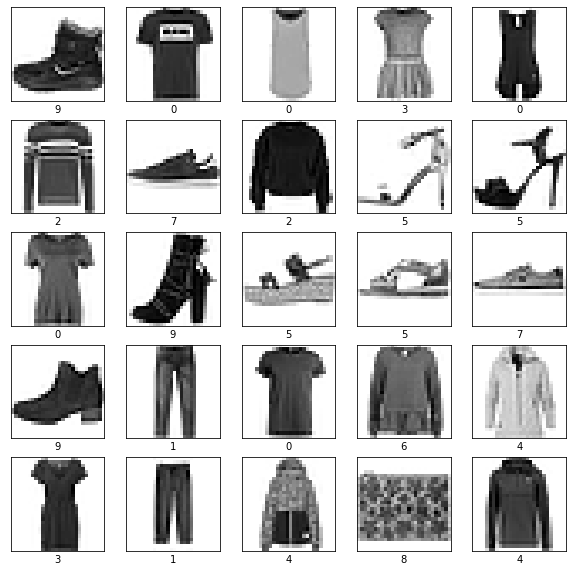

In [14]:
#plot a sample of data
plt.figure(figsize=(10,10))
class_names=['Tshirt/top','trouser','pullOver','dress','coat','Sandal','shirt','sneaker','bag','ankle boot']
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid( False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

plt.show()

In [18]:
def make_model():
  model=Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128,activation='tanh',kernel_initializer='he_normal',input_shape=(28*28,)))
  model.add(Dropout(0.4))
  model.add(Dense(128,activation='tanh',kernel_initializer='he_normal',input_shape=(28*28,)))
  model.add(Dropout(0.4))
  model.add(Dense(128,activation='tanh',kernel_initializer='he_normal',input_shape=(28*28,)))
  model.add(Dropout(0.4))
  model.add(Dense(128,activation='sigmoid',kernel_initializer='he_normal',input_shape=(28*28,)))

  return model

model=make_model()
  

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history= model.fit(train_images, train_labels, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 1.6176 - accuracy: 0.3659
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3610 - accuracy: 0.4414
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2489 - accuracy: 0.4887
Epoch 4/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2057 - accuracy: 0.5089
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1792 - accuracy: 0.5224
Epoch 6/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1564 - accuracy: 0.5326
Epoch 7/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1821 - accuracy: 0.5254
Epoch 8/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1177 - accuracy: 0.5556
Epoch 9/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0325 - accuracy: 0.5884
Epoch 10/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0637 

In [ ]:
print(model.summary())
score = model.evaluate(test_images, test_labels, verbose = 0)
print('test loss', score[0])
print('test top 1 accuracy ', score[1])


In [ ]:
#save a model
checkpoint_path = './tensorflow.cpkt'
model.save_weights(checkpoint_path)

In [ ]:
model_ckpt2 = make_model()
model_ckpt2.load_weights(checkpoint_path)